In [1]:
import pandas as pd
import numpy as np
from helper_functions.clean_transitions import clean_transition_column
from helper_functions.simulate_game import simulate_game
from helper_functions.combine_matrices import combine_team_matrix
import time
from matplotlib import pyplot as plt
#troubleshooting simulate game

C:\Users\mdona\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\mdona\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
def clean_result(sim_game, over_under, a_margin):
    """
    Takes simulated game and produces relevant lines
    """
    totals = []
    for item in sim_game[1]:
        totals.append(item[0]+item[1])

    t_array = np.array(totals)-10
    under_prob= np.mean(t_array<over_under)
    over_prob= np.mean(t_array>over_under)

    if (under_prob<.6)and(over_prob)<.6:
        print('Over-Under Wash')
        print()

    else:
        print('Over {} probabilty: {}%'.format(over_under, np.round(100*over_prob, 1)))
        print('Under {} probabilty: {}%'.format(over_under, np.round(100*under_prob, 1)))
        print()

    margins = []
    for aaa in sim_game[1]:
        margins.append(aaa[0]-aaa[1])

    margins_b = []
    for aaa in sim_game[1]:
        margins_b.append(aaa[1]-aaa[0])

    a_cover = np.mean(np.array(margins)>a_margin)
    b_cover = np.mean(np.array(margins_b) > -a_margin)

    if (a_cover<.6)and(b_cover<.6):
        print('Spread Wash')
        print()

    else:
        print('Team A cover {} probability: {}%'.format(-a_margin, np.round(100*a_cover, 1)))
        print('Team B cover {} probability: {}%'.format(a_margin, np.round(100*b_cover, 1)))
        print()

    a_win = np.mean([x[0]>x[1] for x in sim_game[1]])

    print('Team A win probability: {}%'.format(np.round(100*a_win, 1)))
    print('Team B win probability: {}%'.format(np.round(100*(1-a_win), 1)))

    
    

In [3]:
#if one team does not have data for a certain starting state, we will get a row of nan's which will break the code.
#if this occurs, we can just substitute the average probability for this row?
avg_matrix = pd.read_excel('avg_transition_matrix_with_manual_edits.xlsx', sheet_name = 'Mean Pasted', index_col='Starting_State')

In [ ]:
team_A = pd.read_excel("team_specific_matrix/Colorado St._A.xlsx", index_col = 'Starting_State')
team_B = pd.read_excel("team_specific_matrix/Tennessee_B.xlsx", index_col = 'Starting_State')

In [23]:
team_A = pd.read_excel("team_specific_matrix/Colorado St._A.xlsx", index_col = 'Starting_State')
team_B = pd.read_excel("team_specific_matrix/Tennessee_B.xlsx", index_col = 'Starting_State')

In [28]:
team_A = pd.read_excel("team_specific_matrix/Creighton_A.xlsx", index_col = 'Starting_State')
team_B = pd.read_excel("team_specific_matrix/Colorado St._B.xlsx", index_col = 'Starting_State')

In [29]:
transition_matrix = combine_team_matrix(team_A, team_B)

In [30]:
abc = simulate_game(transition_matrix, num_games=100)

In [31]:
OU = 144.5
team_A_margin = 26.5

In [32]:
clean_result(abc, OU, team_A_margin)

Over 144.5 probabilty: 81.0%
Under 144.5 probabilty: 19.0%

Team A cover -26.5 probability: 7.0%
Team B cover 26.5 probability: 93.0%

Team A win probability: 61.0%
Team B win probability: 39.0%


In [9]:
margins = []
for aaa in abc[1]:
    margins.append(aaa[0]-aaa[1])

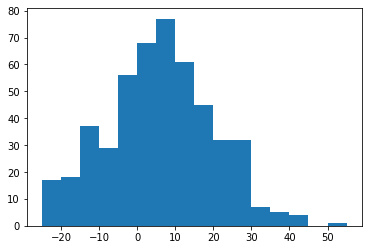

In [10]:
plt.hist(margins, bins=np.linspace(-25,55,17));

In [40]:
np.mean(margins)

11.434

In [41]:
np.median(margins)

11.0

In [20]:
np.mean([x[0]>x[1] for x in abc[1]])

0.656